In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
import warnings
import string
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import spacy

nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive/')
data_path = '/content/drive/My Drive/'
file_path = data_path + "Articles.csv"

Mounted at /content/drive/


In [ ]:
# Read the CSV data into a pandas DataFrame
df = pd.read_csv(file_path)

In [ ]:
df.head()

,title,text,url,authors,date,time,countTags,T1,T2,T3,T4,T5
0,mental note vol 24,photo by josh riemer on unsplash merry christm...,https://medium.com/invisible-illness/mental-no...,ryan fan,2020-12-26,2023-11-23 03:38:00,5,mental health,health,psychology,science,neuroscience
1,your brain on coronavirus,your brain on coronavirus a guide to the curio...,https://medium.com/age-of-awareness/how-the-pa...,simon spichak,2020-09-23,2023-11-23 22:10:00,5,mental health,coronavirus,science,psychology,neuroscience
2,mind your nose,mind your nose how smell training can change y...,https://medium.com/neodotlife/mind-your-nose-f...,NaN,2020-10-10,2023-11-23 20:17:00,5,biotechnology,neuroscience,brain,wellness,science
3,the 4 purposes of dreams,passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,eshan samaranayake,2020-12-21,2023-11-23 16:05:00,5,health,neuroscience,mental health,psychology,science
4,surviving a rod through the head,youve heard of him havent you phineas gage the...,https://medium.com/live-your-life-on-purpose/s...,rishav sinha,2020-02-26,2023-11-23 00:01:00,5,brain,health,development,psychology,science


In [ ]:
df.shape

(192365, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192365 entries, 0 to 192364
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      192360 non-null  object
 1   text       192365 non-null  object
 2   url        192365 non-null  object
 3   authors    161413 non-null  object
 4   date       192365 non-null  object
 5   time       192365 non-null  object
 6   countTags  192365 non-null  int64 
 7   T1         192364 non-null  object
 8   T2         192364 non-null  object
 9   T3         192364 non-null  object
 10  T4         192365 non-null  object
 11  T5         192365 non-null  object
dtypes: int64(1), object(11)
memory usage: 17.6+ MB


In [ ]:
df['data'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192365 entries, 0 to 192364
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   title      192360 non-null  object        
 1   text       192365 non-null  object        
 2   url        192365 non-null  object        
 3   authors    161413 non-null  object        
 4   date       192365 non-null  object        
 5   time       192365 non-null  datetime64[ns]
 6   countTags  192365 non-null  int64         
 7   T1         192364 non-null  object        
 8   T2         192364 non-null  object        
 9   T3         192364 non-null  object        
 10  T4         192365 non-null  object        
 11  T5         192365 non-null  object        
 12  data       192365 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 19.1+ MB


In [ ]:
value_counts = df['T1'].value_counts()

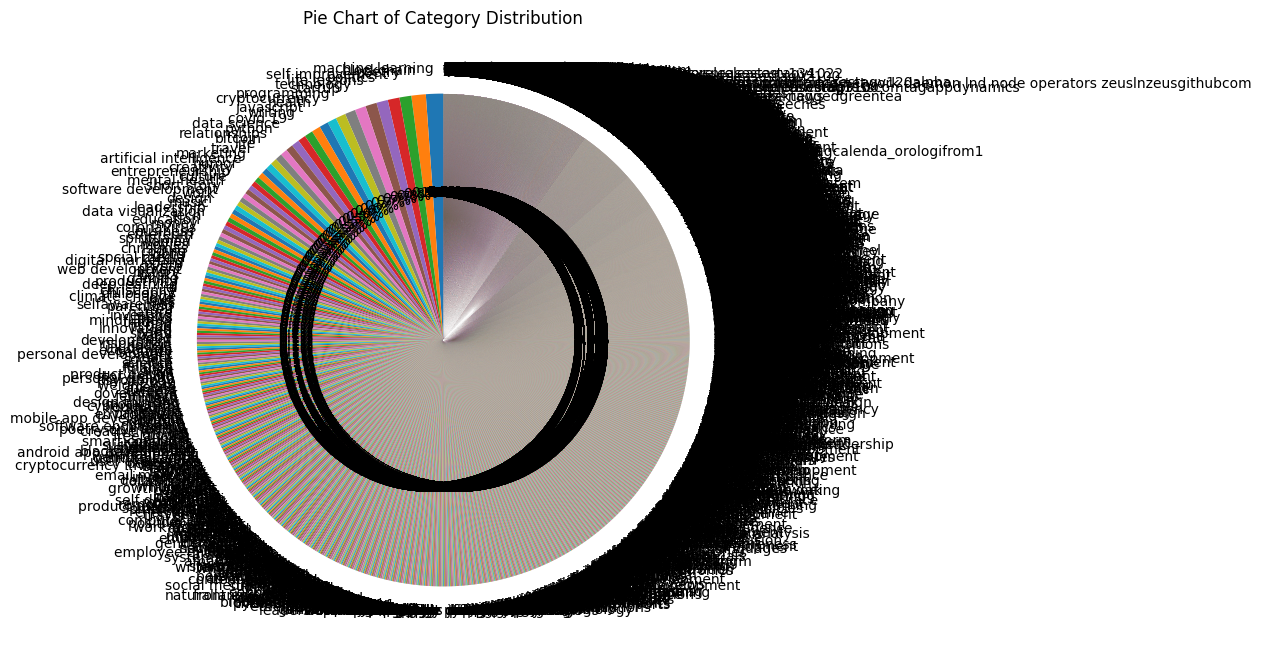

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Category Distribution')
plt.show()

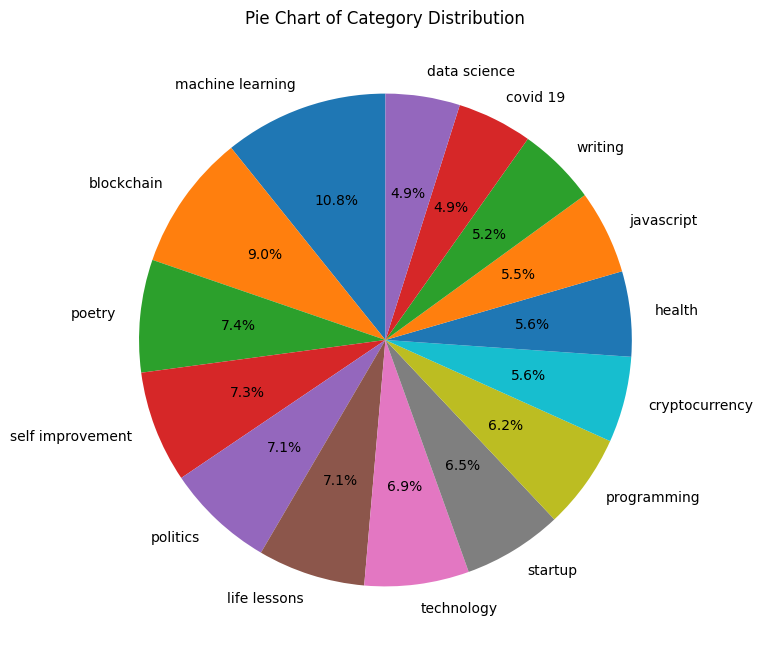

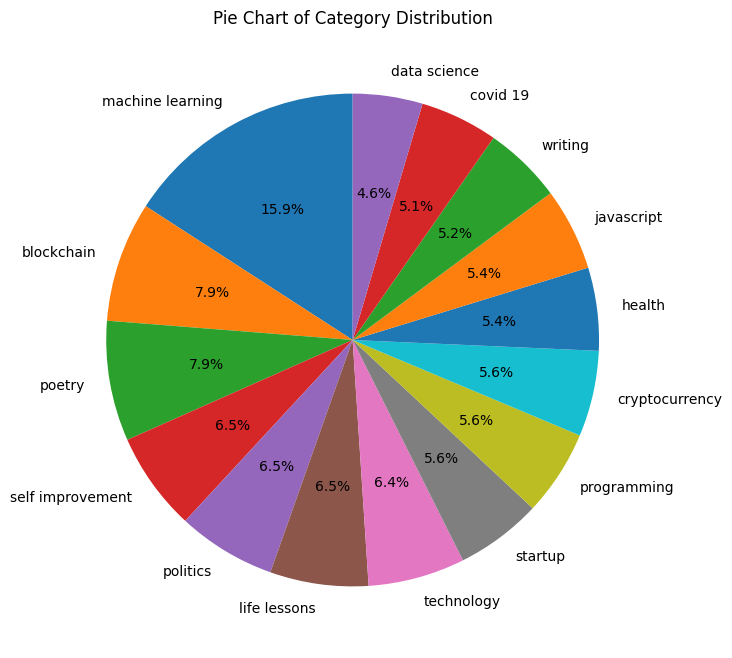

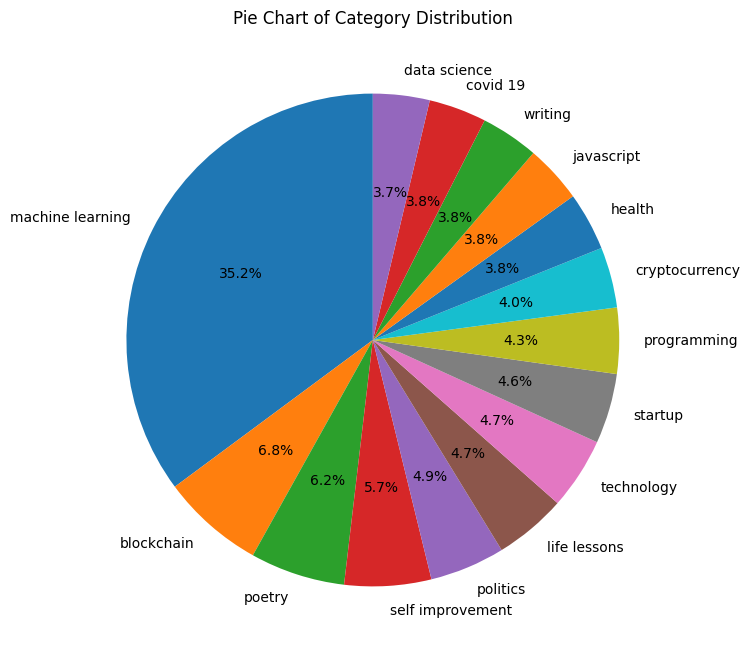

In [ ]:
value_counts = value_counts.head(15)
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Category Distribution')
plt.show()

value_counts2 = df['T2'].value_counts()
value_counts2 = value_counts2.head(15)
plt.figure(figsize=(8, 8))
plt.pie(value_counts2, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Category Distribution')
plt.show()

value_counts3 = df['T3'].value_counts()
value_counts3 = value_counts3.head(15)
plt.figure(figsize=(8, 8))
plt.pie(value_counts3, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Category Distribution')
plt.show()

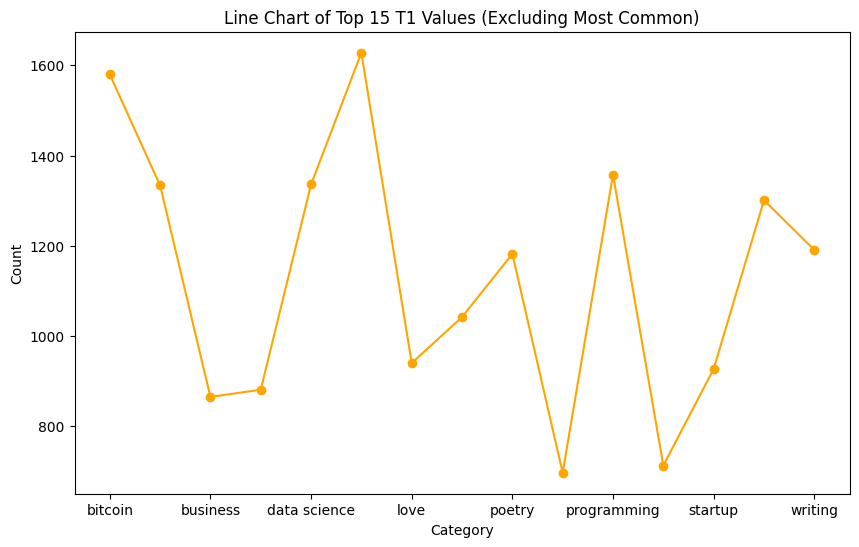

In [ ]:
value_counts = df['T5'].value_counts()

# Select only the top 15 values excluding the most common category
top_values = value_counts.iloc[1:].head(15)

# Plot a line chart for the top 15 values
plt.figure(figsize=(10, 6))
top_values.sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Line Chart of Top 15 T1 Values (Excluding Most Common)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, labs, theme_minimal

# Assuming 'df' is your DataFrame
# Fill missing values in 'authors' with a placeholder (e.g., "Unknown")
df['authors'].fillna("Unknown", inplace=True)

# Extract month and year
df['month'] = df['date'].dt.strftime('%b')
df['year'] = df['date'].dt.strftime('%Y')

# Plot the number of articles by month
plot = ggplot(df, aes(x='month', fill='factor(year)')) + \
       geom_bar(position='dodge', color='black') + \
       labs(title='Number of Articles by Month',
            x='Month',
            y='Count',
            fill='Year') + \
       theme_minimal()

# Show the plot
print(plot)


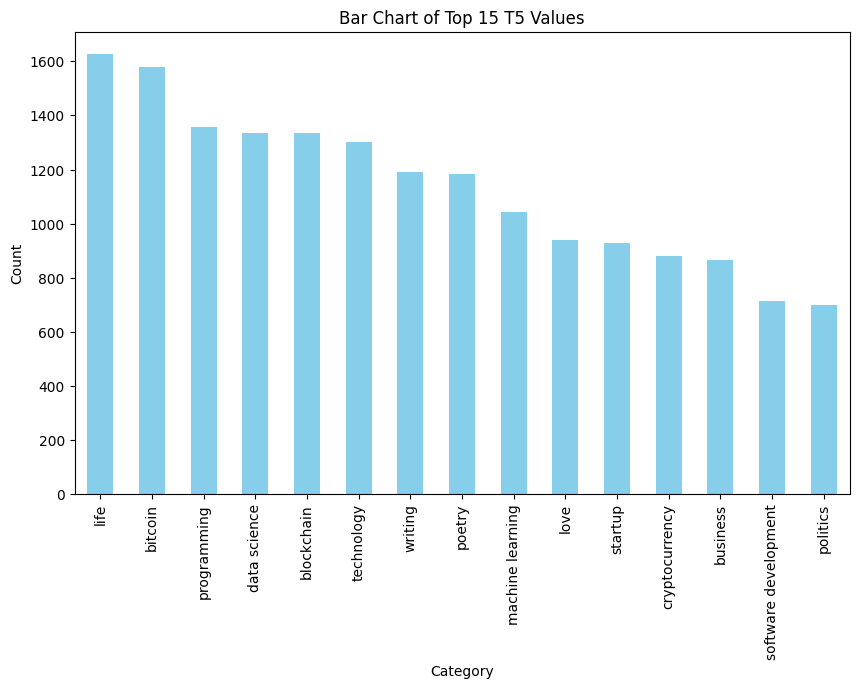

In [ ]:
value_counts = df['T5'].value_counts()

# Select only the top 15 values
top_values = value_counts.iloc[1:].head(15)

# Plot a bar chart for the top 15 values
plt.figure(figsize=(10, 6))
top_values.plot(kind='bar', color='skyblue')
plt.title('Bar Chart of Top 15 T5 Values')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['date'].value_counts()
    for x_label, grp in _df_11.groupby('authors')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('authors')
_ = plt.ylabel('date')

In [ ]:
df['title'] = df['title'].fillna('')
df['text'] = df['text'].fillna('')

In [ ]:
# Function to perform text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a string
    preprocessed_text = " ".join(tokens)

    return preprocessed_text

In [ ]:
# Apply text preprocessing to title and text columns
df['title'] = df['title'].apply(preprocess_text)
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192365 entries, 0 to 192364
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   title      192365 non-null  object        
 1   text       192365 non-null  object        
 2   url        192365 non-null  object        
 3   authors    192365 non-null  object        
 4   date       192365 non-null  object        
 5   time       192365 non-null  datetime64[ns]
 6   countTags  192365 non-null  int64         
 7   T1         192364 non-null  object        
 8   T2         192364 non-null  object        
 9   T3         192364 non-null  object        
 10  T4         192365 non-null  object        
 11  T5         192365 non-null  object        
 12  data       192365 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(10)
memory usage: 19.1+ MB


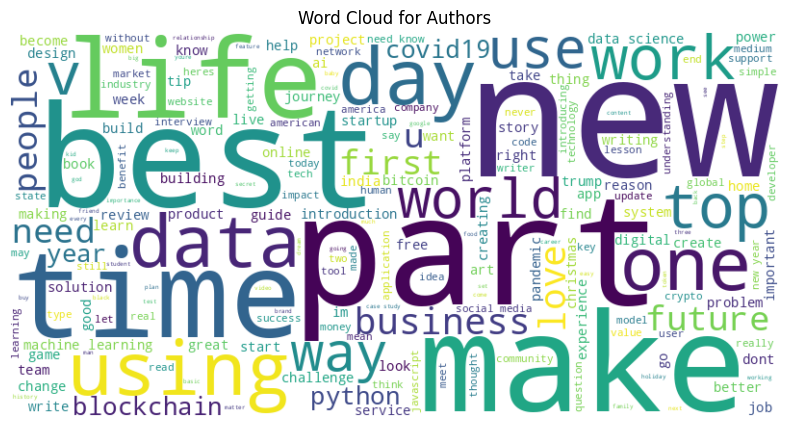

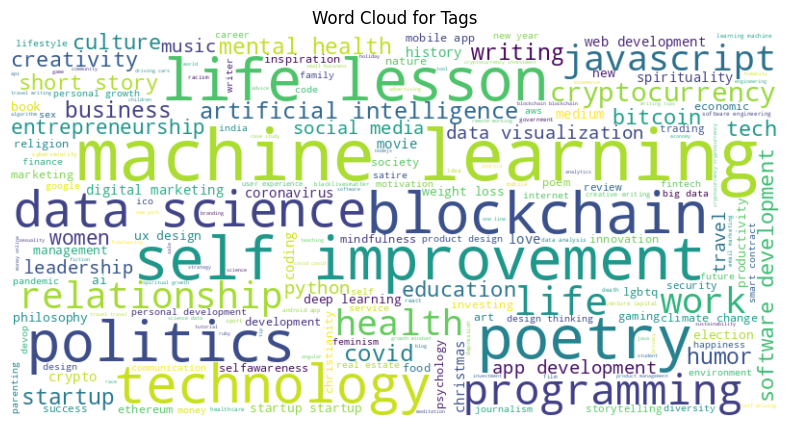

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud for the 'author' column
author_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(author_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Authors')
plt.show()

# Word Cloud for the 'tag' column
tag_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['T1'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(tag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tags')
plt.show()

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install sentence_transformers

In [ ]:
# Importing stock ml libraries
import numpy as np
import pandas as pd


import transformers
import torch
from transformers import BertTokenizer, BertModel, BertConfig
from sentence_transformers import SentenceTransformer,util
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
df_raw =  pd.read_csv(file_path, encoding='utf8')
df_raw.head()

,title,text,url,authors,date,time,countTags,T1,T2,T3,T4,T5
0,mental note vol 24,photo by josh riemer on unsplash merry christm...,https://medium.com/invisible-illness/mental-no...,ryan fan,2020-12-26,2023-11-23 03:38:00,5,mental health,health,psychology,science,neuroscience
1,your brain on coronavirus,your brain on coronavirus a guide to the curio...,https://medium.com/age-of-awareness/how-the-pa...,simon spichak,2020-09-23,2023-11-23 22:10:00,5,mental health,coronavirus,science,psychology,neuroscience
2,mind your nose,mind your nose how smell training can change y...,https://medium.com/neodotlife/mind-your-nose-f...,NaN,2020-10-10,2023-11-23 20:17:00,5,biotechnology,neuroscience,brain,wellness,science
3,the 4 purposes of dreams,passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,eshan samaranayake,2020-12-21,2023-11-23 16:05:00,5,health,neuroscience,mental health,psychology,science
4,surviving a rod through the head,youve heard of him havent you phineas gage the...,https://medium.com/live-your-life-on-purpose/s...,rishav sinha,2020-02-26,2023-11-23 00:01:00,5,brain,health,development,psychology,science


In [ ]:
# Combine text and tags into a single 'content' column
df['content'] = df['text'].fillna('') + ' ' + df['T1'].fillna('') + ' ' + df['T2'].fillna('') + ' ' + df['T3'].fillna('') + ' ' + df['T4'].fillna('') + ' ' + df['T5'].fillna('')

# Display the DataFrame with the combined 'content' column
print(df[['title', 'content']])

In [ ]:
df.to_csv(data_path + 'content.csv', index=False)

In [ ]:
document_embeddings = sbert_model.encode(df['content'])

In [ ]:
file_path = "/content/drive/MyDrive/MachineTranslated code/document_embeddings.npy"

In [ ]:
document_embeddings = np.load(file_path)

In [ ]:
def search_project_title(query_term, all_title_embeddings, topn):
 # query_embedding = np.array((768))
  query_embedding = sbert_model.encode(query)
  #print(type(query_embeddings))
  cos_scores = util.pytorch_cos_sim(query_embedding, document_embeddings)[0]
  top_results = torch.topk(cos_scores, k= topn)

  print("Query:", query)
  print("\nTop {} most similar sentences in corpus:".format(topn))

  for score, idx in zip(top_results[0], top_results[1]):
    print(df.iloc[idx.item()]['content'], ":"  , "(Score: {:.4f})".format(score.item()))

In [ ]:
%%time
query = 'blockchain'
search_project_title(query, document_embeddings, 10)

Query: blockchain

Top 10 most similar sentences in corpus:
eudaimonia co sevencoin 工作誌 blockchain 進展報告 notag : (Score: 0.6899)
sides table blockchain stablecoins gost gochain notag : (Score: 0.6545)
right retrofit blockchain smart contracts iota notag notag : (Score: 0.6419)
right retrofit beorus ethereum inversion smart contracts blockchain : (Score: 0.6249)
sides table blockchain codechain skewed merkle tree merkle tree notag : (Score: 0.6083)
sides table ics blockchain tendermint ibc codechain : (Score: 0.6051)
written please follow us httpsmediumcomeverdreamsoft blockchain bitcoin counterparty notag notag : (Score: 0.6045)
sides table azərbaycan nədir html dərslik öyrən : (Score: 0.5981)
sides table blockchain bitcoin counterparty notag notag : (Score: 0.5973)
sides table blockchain bitcoin counterparty notag notag : (Score: 0.5973)
CPU times: user 280 ms, sys: 511 ms, total: 791 ms
Wall time: 785 ms


In [ ]:
%%time
query = 'data science'
search_project_title(query, document_embeddings, 10)

Query: data science

Top 10 most similar sentences in corpus:
sides table data management data science data driven analytics data : (Score: 0.7133)
sides table data science notag notag notag notag : (Score: 0.6420)
inspiration knowledge anything data science makeai follow data science bar chart data visualization exploratory data analysis visualization : (Score: 0.6329)
sides table machine learning artificial intelligence tensorflow technology data : (Score: 0.6134)
inspiration knowledge anything data science makeai follow data science pandas excel dataframes pandas dataframe : (Score: 0.5941)
article moved available microservices software development complexity checklists safety : (Score: 0.5898)
sides table cpp linked lists data structures c notag : (Score: 0.5820)
bitbon system largescale infrastructure project represents decentralized platform contributing httpswwwbitbonspaceenhome follow simcord decentralized partnerships digitalization notag : (Score: 0.5780)
nowports tech public

In [ ]:
%%time
query = 'data science'
search_project_title(query, document_embeddings, 10)

Query: data science

Top 10 most similar sentences in corpus:
sides table data management data science data driven analytics data : (Score: 0.7133)
sides table data science notag notag notag notag : (Score: 0.6420)
inspiration knowledge anything data science makeai follow data science bar chart data visualization exploratory data analysis visualization : (Score: 0.6329)
sides table machine learning artificial intelligence tensorflow technology data : (Score: 0.6134)
inspiration knowledge anything data science makeai follow data science pandas excel dataframes pandas dataframe : (Score: 0.5941)
article moved available microservices software development complexity checklists safety : (Score: 0.5898)
sides table cpp linked lists data structures c notag : (Score: 0.5820)
bitbon system largescale infrastructure project represents decentralized platform contributing httpswwwbitbonspaceenhome follow simcord decentralized partnerships digitalization notag : (Score: 0.5780)
nowports tech public

In [ ]:
import pickle
import pickle

# Assuming document_embeddings is a NumPy array
with open('document_embeddings.pkl', 'wb') as f:
    pickle.dump(document_embeddings, f)

# Load the pickled document_embeddings
with open('document_embeddings.pkl', 'rb') as f:
    loaded_document_embeddings = pickle.load(f)

# Now you can use loaded_document_embeddings in your Flask application


In [ ]:
from flask import Flask, request, jsonify
import pickle
from sentence_transformers import SentenceTransformer, util

# Load the pickled document_embeddings
with open('document_embeddings.pkl', 'rb') as f:
    document_embeddings = pickle.load(f)

# Load your SentenceTransformer model
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

app = Flask(__name__)

@app.route('/search', methods=['GET'])
def search():
    query = request.args.get('query', default='', type=str)
    topn = request.args.get('topn', default=10, type=int)

    # Encode the query
    query_embedding = sbert_model.encode(query)

    # Calculate cosine similarity
    cos_scores = util.pytorch_cos_sim(query_embedding, document_embeddings)[0]
    top_results = torch.topk(cos_scores, k=topn)

    results = []
    for score, idx in zip(top_results[0], top_results[1]):
        result = {
            'content': df.iloc[idx.item()]['content'],
            'score': score.item()
        }
        results.append(result)

    return jsonify(results)

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
def generate_candidates(prev_candidates, k):
    candidates = set()
    for itemset1 in prev_candidates:
        for itemset2 in prev_candidates:
            union_set = itemset1.union(itemset2)
            if len(union_set) == k:
                candidates.add(union_set)
    return candidates

def prune_infrequent(itemsets, transactions, min_support):
    frequent_itemsets = set()
    item_counts = {}

    for itemset in itemsets:
        for transaction in transactions:
            if itemset.issubset(transaction):
                item_counts[itemset] = item_counts.get(itemset, 0) + 1

    for itemset, count in item_counts.items():
        support = count / len(transactions)
        if support >= min_support:
            frequent_itemsets.add(itemset)

    return frequent_itemsets

def apriori(dataset, min_support):
    transactions = [set(transaction) for transaction in dataset]
    k = 1
    candidates = {frozenset([item]) for item in set.union(*transactions)}
    frequent_itemsets = set()

    while candidates:
        candidates = generate_candidates(candidates, k)
        frequent_itemsets_k = prune_infrequent(candidates, transactions, min_support)
        frequent_itemsets.update(frequent_itemsets_k)
        k += 1

    return frequent_itemsets

# Extract relevant columns for the transaction data
transaction_data = df2[['T1', 'T2', 'T3', 'T4', 'T5']].values.tolist()

# Set the minimum support threshold
min_support = 0.4

# Apply the Apriori algorithm
result = apriori(transaction_data, min_support)
print("Frequent Itemsets:", result)
